In [1]:
#import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the non seperable train data
data = pd.read_csv("train (1).txt")
data.columns=["X1",'X2',"target"]
data

,X1,X2,target
0,23.5740,14.405,1
1,28.7860,14.495,1
2,35.5690,23.696,1
3,32.5490,24.228,1
4,33.4600,20.674,1
...,...,...,...
1044,18.7920,37.234,3
1045,19.0620,38.697,3
1046,19.7230,42.395,3
1047,17.9200,35.735,3


In [3]:
#decribe the data depending on the value of target variable
f=data.groupby("target")
f.describe()

X1                                                           \
        count       mean       std      min     25%      50%       75%   
target                                                                   
1       349.0  26.129912  7.170986   5.3208  19.978  26.6480  31.67100   
2       350.0  24.744046  2.292458  19.4890  23.095  24.7775  26.36425   
3       350.0  14.147713  4.879897  -3.1578  10.826  14.3335  17.36250   

                   X2                                                  \
           max  count       mean       std     min       25%      50%   
target                                                                  
1       43.860  349.0  23.910714  6.663467   8.192  18.35100  23.2460   
2       30.571  350.0  25.056291  2.607969  19.860  22.96300  24.9985   
3       26.778  350.0  39.855154  4.789567  27.975  36.34225  39.8750   

                          
             75%     max  
target                    
1       29.46300  41.748  
2       26.93625  30.740  
3       43.15575  53.300

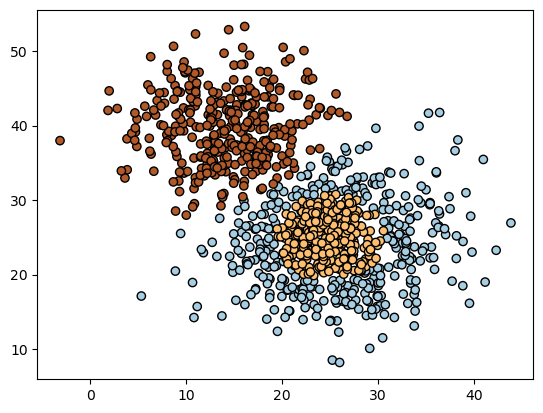

In [4]:
#for visualization draw scatter plot
plt.scatter(data['X1'], data['X2'], c=data['target'], cmap=plt.cm.Paired,marker='o',edgecolors='k')

# Case-2

In [5]:
#find the mean and varience corresponding to each class value
class_labels = [1, 2, 3]
class_priors = [len(data[data['target'] == label]) / len(data) for label in class_labels]
class_means = []
class_covariances = []
for label in class_labels:
    subset = data[data['target'] == label]
    class_means.append(subset[['X1', 'X2']].mean().values)
    class_covariances.append(subset[['X1', 'X2']].cov().values)
print(class_means)
print(class_covariances)


[array([26.12991175, 23.91071404]), array([24.74404571, 25.05629143]), array([14.14771257, 39.85515429])]
[array([[51.42303652,  8.33287152],
       [ 8.33287152, 44.40179495]]), array([[5.25536251, 0.08088763],
       [0.08088763, 6.8015004 ]]), array([[23.81339307,  1.12367789],
       [ 1.12367789, 22.93995337]])]


In [6]:
#taking the range max and min of both the variable
x_min, x_max = data['X1'].min() , data['X1'].max() 
y_min, y_max = data['X2'].min() , data['X2'].max()
#take the meshgrid for all combination of value
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

In [7]:
from math import pi, sqrt, exp
#define the classifier using the parameter estimation value draw a region a large number of point
def classifier(class_covariances,class_labels=class_labels,class_priors=class_priors,class_means=class_means):
    posterior_probs = []
    for label in class_labels:
        #for each class value find mean ,covarience
        mean = class_means[label - 1]
        covariance = class_covariances[label - 1]
        prior = class_priors[label - 1]

        det_cov = np.linalg.det(covariance)
        inv_cov = np.linalg.inv(covariance)

        x = np.column_stack((xx.ravel(), yy.ravel()))
        #for each class value find posterior
        x_minus_mean = x - mean
        exponent = -0.5 * np.sum((x_minus_mean @ inv_cov) * x_minus_mean, axis=1)
        normalization = 1 / (2 * pi * sqrt(det_cov))
        posterior = normalization * np.exp(exponent) * prior
        #the size of posterioris large so reshape for maintain dimension
        posterior = posterior.reshape(xx.shape)
        #adding all probability in the list posterioer_probs
        posterior_probs.append(posterior)
    return(posterior_probs)

In [8]:
#take label value for which class the probability is maximum
predicted_labels = np.argmax(classifier(class_covariances), axis=0) + 1 
print(predicted_labels)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]
 [3 3 3 ... 1 1 1]]


In [9]:
#read the test data for prediction
test_data=pd.read_csv("dev (1).txt")
#Give the column heading
test_data.columns=["X1",'X2',"target"]

In [10]:
test_data

,X1,X2,target
0,33.3550,17.027,1
1,19.1980,27.011,1
2,28.4230,33.542,1
3,21.9950,30.646,1
4,34.0610,19.766,1
...,...,...,...
294,14.8920,42.646,3
295,19.6890,37.980,3
296,9.6156,36.889,3
297,9.8454,34.290,3


In [11]:
#find the probability corresponding to each class
#x_test, y_test = np.meshgrid(x_values, y_values)
def prediction_for_test_data(class_covariances,class_labels=class_labels,class_priors=class_priors,class_means=class_means,test_data=test_data):
    x_values = test_data['X1'].values
    y_values = test_data['X2'].values
    posterior_test = []
    for label in class_labels:
        mean = class_means[label - 1]
        covariance = class_covariances[label - 1]
        prior = class_priors[label - 1]
        #calcutate determinant and inverse of the covarience matrix
        det_cov = np.linalg.det(covariance)
        inv_cov = np.linalg.inv(covariance)
        #only take pair element one from x_value and other from y_valu
        x = np.column_stack((x_values.ravel(), y_values.ravel()))
        x_minus_mean = x - mean
        exponent = -0.5 * np.sum((x_minus_mean @ inv_cov) * x_minus_mean, axis=1)
        normalization = 1 / (2 * pi * sqrt(det_cov))
        posterior = normalization * np.exp(exponent) * prior
        #append in the list for checking which clas posterior is maximum
        posterior_test.append(posterior)
    return posterior_test

In [12]:
#To maintain the label add 1
predicted_labels_test = np.argmax(prediction_for_test_data(class_covariances), axis=0) + 1 
print(predicted_labels_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 2 2 2 2
 2 1 2 2 2 2 2 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]


In [13]:
#define the multivariate normal pdf function
def multivariate_normal_pdf(pos, mu, Sigma):
    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

In [14]:
#function for ploting the contour
def contour_plot(data):
    class_1_data = data[data["target"] == 1][["X1", "X2"]]
    class_2_data = data[data["target"] == 2][["X1", "X2"]]
    class_3_data = data[data["target"] == 3][["X1", "X2"]]
    x = np.linspace(data["X1"].min(), data["X1"].max(), 100)
    y = np.linspace(data["X2"].min(), data["X2"].max(), 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
     #calcute mean and varience corresponding to each class
    C_1_means = class_1_data.mean().values
    C_1_cov = class_1_data.cov().values
    C_2_means = class_2_data.mean().values
    C_2_cov = class_2_data.cov().values
    C_3_means = class_3_data.mean().values
    C_3_cov = class_3_data.cov().values
    # Calculate PDF for each class
    #give the pdf function value for each point of pos
    Z_1 = multivariate_normal_pdf(pos,C_1_means,C_1_cov)
    Z_2 = multivariate_normal_pdf(pos,C_2_means,C_2_cov)
    Z_3 = multivariate_normal_pdf(pos,C_3_means,C_3_cov)
    return X,Y,Z_1,Z_2,Z_3

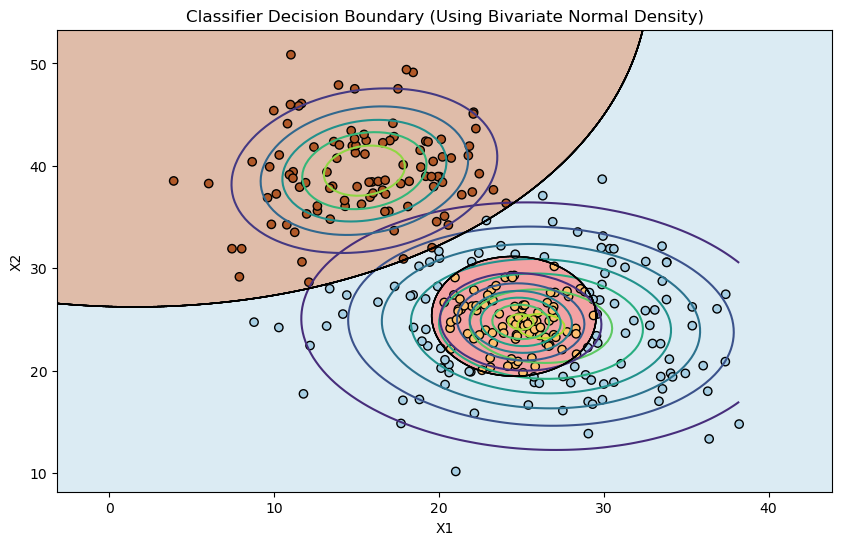

In [15]:
from matplotlib import cm
#drawing the classifier and the test data scatter plot and the test data contour
def classufier_graph(class_covariances):
    predicted_labels = np.argmax(classifier(class_covariances), axis=0) + 1 
    predicted_labels_test = np.argmax(prediction_for_test_data(class_covariances), axis=0) + 1 
    #values=functionn(test_data["X1"], test_data['X2'],test_data["target"],class_covariances)
    fig=plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, predicted_labels, alpha=0.4, cmap=plt.cm.Paired)
    #plt.contourf(test_data["X1"], test_data["X2"], values, alpha=0.4, cmap=plt.cm.Paired)
    (X,Y,Z_1,Z_2,Z_3)=contour_plot(test_data)
    #for contour ploting
    plt.contour(X, Y, Z_1)
    plt.contour(X, Y, Z_2)
    plt.contour(X, Y, Z_3)
    plt.contour(xx, yy, predicted_labels, colors='k', linewidths=1)  # Contour lines
    plt.scatter(test_data["X1"], test_data['X2'], c=predicted_labels_test, cmap=plt.cm.Paired, marker='o', edgecolors='k')  # Change color and marker
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Classifier Decision Boundary (Using Bivariate Normal Density)')
    plt.show()
classufier_graph(class_covariances)

In [16]:
#for compairing we define a dataframe
df = pd.DataFrame({"prediction" :predicted_labels_test , "exact" :test_data['target']})
df=df.reset_index()
df

,index,prediction,exact
0,0,1,1
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1
...,...,...,...
294,294,3,3
295,295,3,3
296,296,3,3
297,297,3,3


In [17]:
#count the result i,e exact and prediction
counts=df.groupby(['prediction','exact']).size()
counts

prediction  exact
1           1         97
            2         10
2           2         90
3           1          2
            3        100
dtype: int64

In [18]:
#calculate the accuracy
accuracy = np.mean( predicted_labels_test== test_data['target'])
print("Test accuracy:", accuracy)

Test accuracy: 0.959866220735786


# Case-1

In [19]:
#calculate the covarience of each class
cov2=np.array(data[data["target"]==1].iloc[:,0:2].cov())
cov3=np.array(data[data["target"]==2].iloc[:,0:2].cov())
cov4=np.array(data[data["target"]==3].iloc[:,0:2].cov())
print(cov2)
print(cov3)
print(cov4)

[[51.42303652  8.33287152]
 [ 8.33287152 44.40179495]]
[[5.25536251 0.08088763]
 [0.08088763 6.8015004 ]]
[[23.81339307  1.12367789]
 [ 1.12367789 22.93995337]]


In [20]:
#taking the weighted average of the covarience
cov=(349*cov2+350*cov3+350*cov4)/1049
print(cov)
covariances1=[cov,cov,cov]
covariances1

[[26.80715367  3.17423269]
 [ 3.17423269 24.69564848]]


[array([[26.80715367,  3.17423269],
        [ 3.17423269, 24.69564848]]),
 array([[26.80715367,  3.17423269],
        [ 3.17423269, 24.69564848]]),
 array([[26.80715367,  3.17423269],
        [ 3.17423269, 24.69564848]])]

In [21]:
#maintain the class label add up by 1
predicted_labels = np.argmax(classifier(covariances1), axis=0) + 1 
print(predicted_labels)

[[2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


In [22]:
#predicting for test data
predicted_labels_test = np.argmax(prediction_for_test_data(covariances1), axis=0) + 1 
print(predicted_labels_test)

[1 2 2 2 1 2 2 1 1 2 1 1 1 1 2 1 1 1 2 1 2 2 2 2 2 2 2 1 1 1 1 1 1 2 1 2 2
 2 1 2 2 2 1 2 1 1 1 1 1 1 2 1 2 2 2 2 2 1 1 1 1 1 2 2 2 1 2 2 2 2 1 2 1 1
 2 2 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 2 2 1 2 1 1 1 1 2 2 2 1 1 1 2 2 2 2
 2 2 1 1 1 2 1 1 1 2 2 2 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 1
 2 2 1 2 2 1 2 1 1 2 1 1 1 2 1 2 2 2 1 2 1 1 2 2 1 2 2 1 2 1 1 2 1 2 2 1 1
 2 1 2 2 2 2 2 2 1 2 1 1 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]


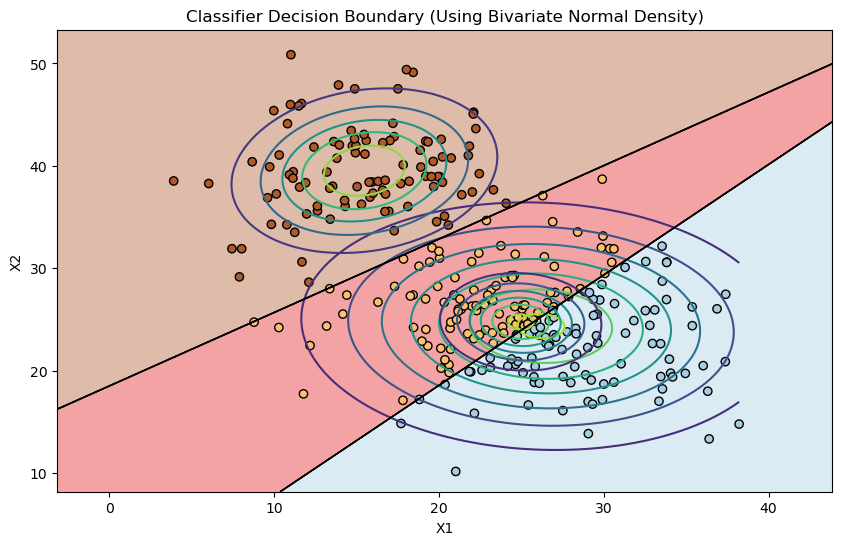

In [23]:
classufier_graph(covariances1)

In [24]:
#crate a dataframe for visualizing the predited value and exact value
df = pd.DataFrame({"prediction" :predicted_labels_test , "exact" :test_data['target']})
df=df.reset_index()
df

,index,prediction,exact
0,0,1,1
1,1,2,1
2,2,2,1
3,3,2,1
4,4,1,1
...,...,...,...
294,294,3,3
295,295,3,3
296,296,3,3
297,297,3,3


In [25]:
#count the carrect classification and missclassification
counts=df.groupby(['prediction','exact']).size()
counts

prediction  exact
1           1         54
            2         44
2           1         45
            2         56
3           3        100
dtype: int64

In [26]:
#calculate the accuracy with respect to 1
accuracy = np.mean( predicted_labels_test== test_data['target'])
print("Test accuracy:", accuracy)

Test accuracy: 0.7023411371237458


# Case-3 Naive Bayes

In [27]:
#calculate the sigma value for each class distribution by MLE estimation formula
x=data[data["target"]==1]["X1"]
y=data[data["target"]==1]["X2"]
data1 = np.column_stack((x, y))
mu = np.mean(data1, axis=0)
sum_squared_distances = np.sum(np.square(data1- mu))
result1= sum_squared_distances / (2 * len(data1))
print(result1)


47.775130875620405


In [28]:
x=data[data["target"]==2]["X1"]
y=data[data["target"]==2]["X2"]
data1 = np.column_stack((x, y))
mu = np.mean(data1, axis=0)
sum_squared_distances = np.sum(np.square(data1- mu))
result2= sum_squared_distances / (2 * len(data1))
print(result2)


6.0112073679183675


In [29]:
x=data[data["target"]==3]["X1"]
y=data[data["target"]==3]["X2"]
data1 = np.column_stack((x, y))
mu = np.mean(data1, axis=0)
sum_squared_distances = np.sum(np.square(data1- mu))
result3= sum_squared_distances / (2 * len(data1))
print(result3)


23.309882727076083


In [30]:
#taking the weighted average
sigma=(349*result1+350*result2+350*result3)/1049
sigma

25.67769514665355

In [31]:
#mutliplied with identity element to construct the covarience matrix
v=sigma*np.eye(2)
covariances3=[sigma*v,sigma*v,sigma*v]
covariances3

[array([[659.34402804,   0.        ],
        [  0.        , 659.34402804]]),
 array([[659.34402804,   0.        ],
        [  0.        , 659.34402804]]),
 array([[659.34402804,   0.        ],
        [  0.        , 659.34402804]])]

In [32]:
predicted_labels = np.argmax(classifier(covariances3), axis=0) + 1 
print(predicted_labels)

[[2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


In [33]:
#for classifier
predicted_labels_test = np.argmax(prediction_for_test_data(covariances3), axis=0) + 1 
print(predicted_labels_test)

[1 2 2 2 1 2 2 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 2 1 2 2
 2 1 2 2 2 1 2 1 1 1 1 1 1 2 2 2 2 2 2 2 1 1 1 2 1 2 2 2 1 2 2 2 2 1 2 1 1
 2 2 2 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 2 2 2 2 1 1 1 1 2 2 2 2 1 1 2 2 2 2
 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 2
 2 2 1 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1 1 2 1 2 2 2 1
 2 2 2 2 2 2 2 2 1 2 1 1 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3]


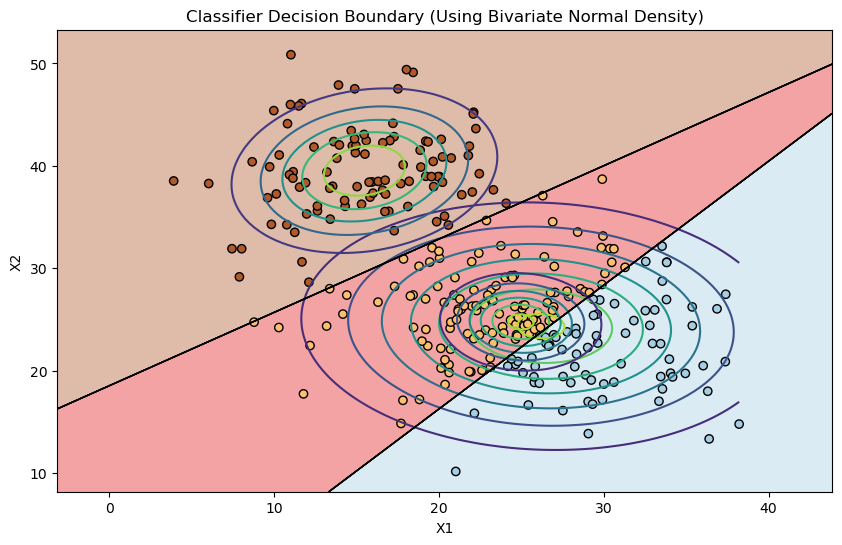

In [34]:
#plot the classifier ,contour and scatter for test data
classufier_graph(covariances3)

In [35]:
#construct a dataframe
df = pd.DataFrame({"prediction" :predicted_labels_test , "exact" :test_data['target']})
df=df.reset_index()
df

,index,prediction,exact
0,0,1,1
1,1,2,1
2,2,2,1
3,3,2,1
4,4,1,1
...,...,...,...
294,294,3,3
295,295,3,3
296,296,3,3
297,297,3,3


In [36]:
#count the correctly classified point and miss classified point
counts=df.groupby(['prediction','exact']).size()
counts

prediction  exact
1           1         47
            2         29
2           1         52
            2         71
3           3        100
dtype: int64

In [37]:
#caculate accuracy with respect to 1
accuracy = np.mean( predicted_labels_test== test_data['target'])
print("Test accuracy:", accuracy)

Test accuracy: 0.7290969899665551


# Case-4

In [38]:
#covarience matrix of each class each diferent but the features are conditiona
v=sigma*np.eye(2)
covariances4=[result1*v,result2*v,result3*v]
covariances4

[array([[1226.75524622,    0.        ],
        [   0.        , 1226.75524622]]),
 array([[154.35395026,   0.        ],
        [  0.        , 154.35395026]]),
 array([[598.54406257,   0.        ],
        [  0.        , 598.54406257]])]

In [39]:
#predicted value for a train element
predicted_labels = np.argmax(classifier(covariances4), axis=0) + 1 
print(predicted_labels)

[[3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 [3 3 3 ... 2 2 2]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]]


In [40]:
#prediting the target value for each element of the test data
predicted_labels_test = np.argmax(prediction_for_test_data(covariances4), axis=0) + 1 
print(predicted_labels_test)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 3 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2
 3 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 2 2 3 2 2 3 2 3 2 3 2 2 2 2 2
 2 2 2]


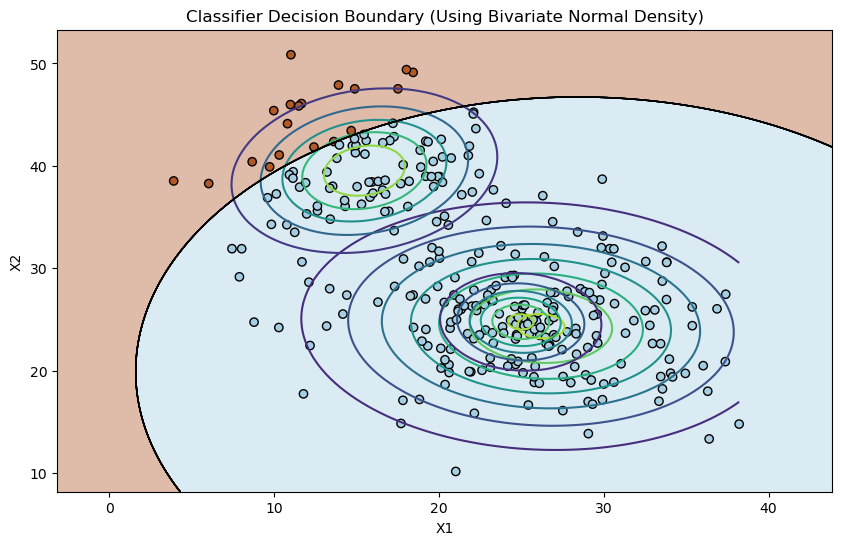

In [41]:
#calling the function for plotting the case 4 criteria
classufier_graph(covariances4)

In [42]:
#define a dataframe for compairing the exact and predited value side by side
df = pd.DataFrame({"prediction" :predicted_labels_test , "exact" :test_data['target']})
df=df.reset_index()
df

,index,prediction,exact
0,0,2,1
1,1,2,1
2,2,2,1
3,3,2,1
4,4,2,1
...,...,...,...
294,294,2,3
295,295,2,3
296,296,2,3
297,297,2,3


In [43]:
#count the result the number of correctly clasified and missclassified
counts=df.groupby(['prediction','exact']).size()
counts

prediction  exact
2           1         99
            2        100
            3         81
3           3         19
dtype: int64

In [44]:
#calculate accuracy with respect to 1
accuracy = np.mean( predicted_labels_test== test_data['target'])
print("Test accuracy:", accuracy)

Test accuracy: 0.3979933110367893
